Import des librairies

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [2]:
#Tensor Features (11 exemple, avec une seule valeur)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
#Tensor des labels 
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])

t_un = 0.1 * t_u #Normalisation simple des features ()
t_un

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [3]:
# Fonction Hypothèse
def model(t_u, w, b):
    return w * t_u + b

In [4]:
#Fonction de coût (MSE)
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
#Initialisation du Tensor des paramètres, en indiquant qu'il faudra calculer les gradients
params = torch.tensor([1.0, 0.0], requires_grad=True)
# Le gradient des paramètres n'existe pas encore
print(params.grad)

None


In [6]:
#On calcul la Fonction de coût en lui passant le Tensor des params:
loss = loss_fn(model(t_u, *params), t_c)
#On lance la gradient Descent (Bakpropgation). Pytorch a retenu les opérations réalisées pour calculer loss
loss.backward()
#Le gradient des paramètres est maintenant renseigné
params.grad

tensor([4517.2969,   82.6000])

In [7]:
# !!! Il faut remettre le gradient à 0 entre chaque itération, car les gradients s'accumulent
if params.grad is not None:
    params.grad.zero_()
print(params.grad)

tensor([0., 0.])


In [8]:
#Apprentissage
n_epochs=5000
learning_rate = 1e-2

for epoch in range(1, n_epochs + 1):
    if params.grad is not None:  # <1>
        params.grad.zero_()
    
    t_p = model(t_un, *params) 
    loss = loss_fn(t_p, t_c)
    loss.backward()
    
    with torch.no_grad():  # <2>
        params -= learning_rate * params.grad

    if epoch % 500 == 0:
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
print(params)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647
tensor([  5.3671, -17.3012], requires_grad=True)


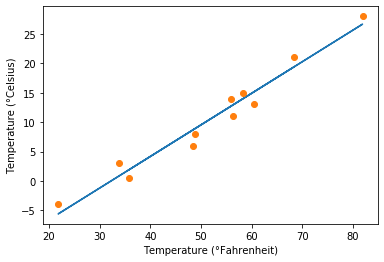

In [9]:
t_p = model(t_un, *params)

plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")

# Il faut appliquer  detach à tp pour qu'il ne fasse pas partie du calcul du gradient
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')